In [13]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.gridspec import GridSpec
import seaborn as sns 
%matplotlib inline 
from matplotlib import rc
rc('font', family = 'AppleGothic')
plt.rcParams['axes.unicode_minus'] = False
from plotly.subplots import make_subplots
import plotly.graph_objects as go
plt.style.use(['ggplot'])

## 주별로 표시하기위해
from math import ceil
from datetime import datetime, timezone, timedelta
pd.options.display.max_rows=1000

#데이터 전처리를 위해
from ast import literal_eval
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity

from pandas.tseries.holiday import AbstractHolidayCalendar, Holiday
import platform
import missingno as msno
from datetime import datetime, timezone, timedelta
import pytz
from tqdm.notebook import tqdm as tqdm

import warnings
warnings.filterwarnings(action='ignore')

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

pd.options.display.float_format = '{:.0f}'.format
pd.options.display.max_rows=1000



from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.manifold import TSNE


In [2]:
df = pd.read_csv('과제수정DB.csv')
data = df[['goodsnm', 'brandnm', 'sub_type']]

In [40]:
tfidf = TfidfVectorizer(max_features = 20, max_df=0.95, min_df=0)

In [41]:
tfidf_matrix = tfidf.fit_transform(data['goodsnm'])
print(tfidf_matrix.shape)

(1471, 20)


In [42]:
tfidf_dict = tfidf.get_feature_names()
print(tfidf_dict)

['bag', 'basic', 'beige', 'black', 'brown', 'button', 'chain', 'check', 'clutch', 'coat', 'cross', 'detail', 'dress', 'jacket', 'line', 'monogram', 'pattern', 'pocket', 'quilted', 'shoulder']


In [43]:
data_array = tfidf_matrix.toarray()
df_data = pd.DataFrame(data_array, columns=tfidf_dict)
data.shape

(1471, 3)

In [44]:
tsne = TSNE(n_components=2, n_iter=10000, verbose=1)

In [45]:
data_array.T.shape

(20, 1471)

In [46]:
Z = tsne.fit_transform(data_array.T)

[t-SNE] Computing 19 nearest neighbors...
[t-SNE] Indexed 20 samples in 0.000s...
[t-SNE] Computed neighbors for 20 samples in 0.002s...
[t-SNE] Computed conditional probabilities for sample 20 / 20
[t-SNE] Mean sigma: 1125899906842624.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 40.289513
[t-SNE] KL divergence after 1100 iterations: 0.404925


In [47]:
print(Z[0:5])
print('Top words: ',len(Z))

[[ 121.0697    -22.967085]
 [ 108.4405    -84.867096]
 [  77.05167   120.4179  ]
 [  63.679035 -134.03203 ]
 [  -9.894081 -105.63782 ]]
Top words:  20


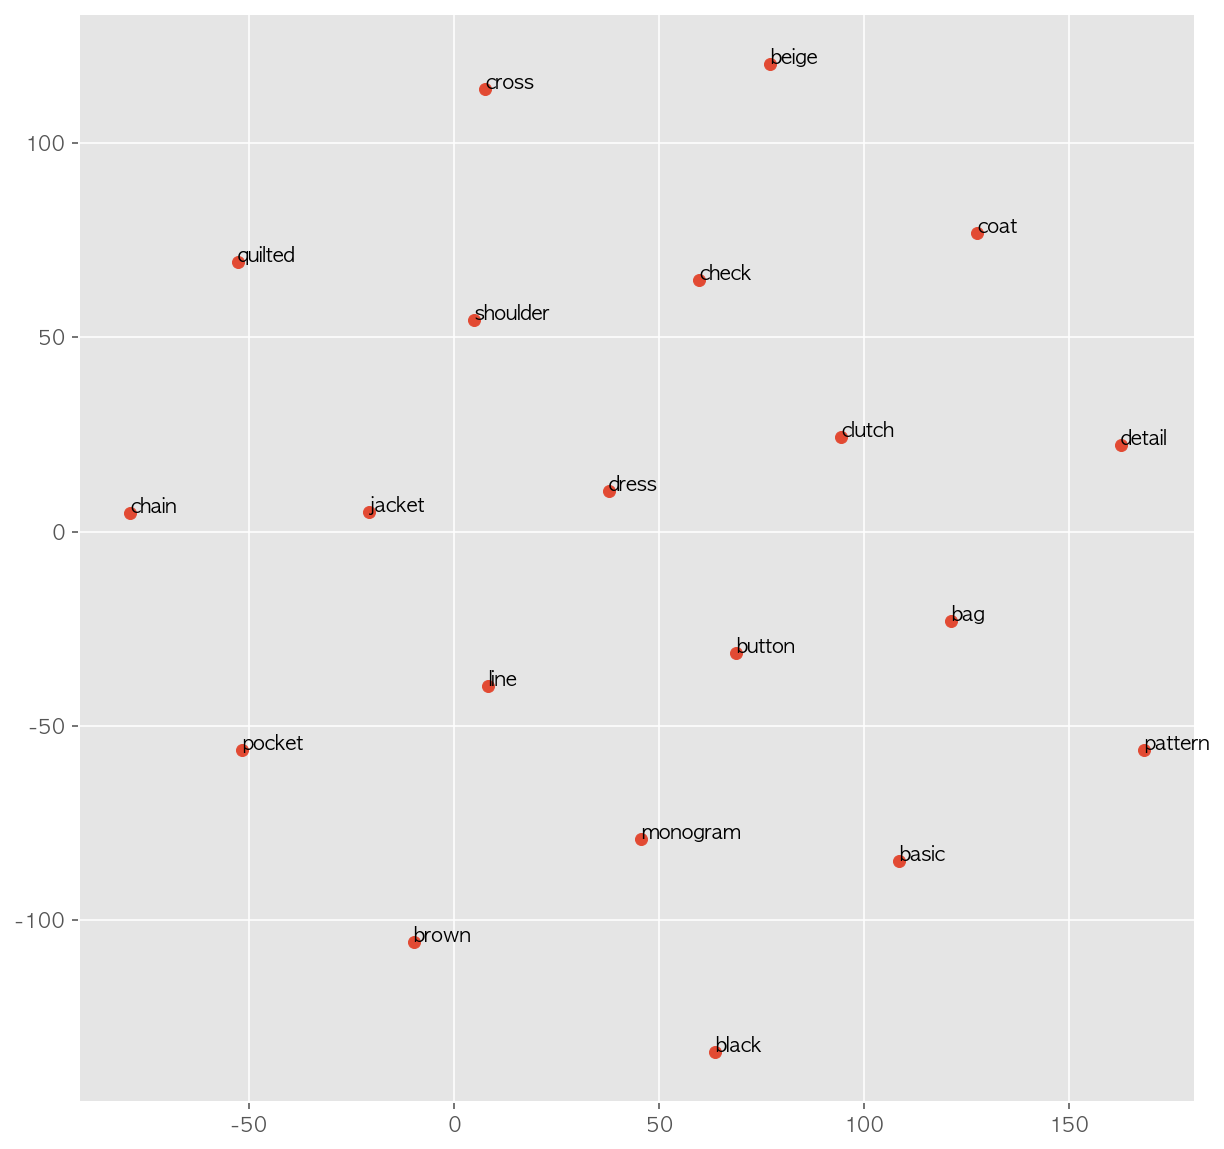

In [48]:
plt.figure(figsize=(10, 10))
plt.scatter(Z[:,0], Z[:,1])
for i in range(len(tfidf_dict)):
    plt.annotate(s=tfidf_dict[i].encode("utf8").decode("utf8"), xy=(Z[i,0], Z[i,1]))

plt.draw()

In [49]:
cosine_matrix = cosine_similarity(tfidf_matrix, tfidf_matrix)
cosine_matrix.shape

(1471, 1471)

In [50]:
title2idx = {}
for i, c in enumerate(data['goodsnm']): 
    title2idx[i] = c

In [51]:
idx2title = {}
for i, c in title2idx.items(): 
    idx2title[c] = i

In [52]:
idx = idx2title['pocket graphics pattern sweat-pants white']
sim_scores = [(i, c) for i, c in enumerate(cosine_matrix[idx]) if i != idx] 
sim_scores = sorted(sim_scores, key = lambda x: x[1], reverse=True) 
sim_scores[0:10]
sim_scores = [(title2idx[i], score) for i, score in sim_scores[0:10]]
sim_scores

[('pocket graphics pattern zipup-jumper navy', 1.0000000000000002),
 ('pocket graphics pattern hoodie yellow', 1.0000000000000002),
 ('pocket color block pattern fur-outer', 1.0000000000000002),
 ('pocket stripe pattern shirts pink', 1.0000000000000002),
 ('pocket Quilting pattern padding-outer khaki', 1.0000000000000002),
 ('pocket lettering pattern hoodie black', 0.9003970789078948),
 ('pocket stripe pattern slacks black', 0.9003970789078948),
 ('pocket basic pattern fur-outer ivory', 0.8591735945219221),
 ('pocket basic pattern fur-outer pink', 0.8591735945219221),
 ('pocket basic pattern fur-outer grey', 0.8591735945219221)]